In [42]:
from models import EEGNet, DeepConvNet, MLP
from dataloader import read_bci_data
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [43]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [44]:
def seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed(500)

In [45]:
## Load data
train_data, train_label, test_data, test_label = read_bci_data()

train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)

test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

train = TensorDataset(train_data, train_label)
train_dataload = DataLoader(train,batch_size=64, shuffle=True)

test = TensorDataset(test_data, test_label)
test_dataload = DataLoader(test,batch_size=64, shuffle=False)

In [18]:
elu_train_acc = []
elu_test_acc = []
relu_train_acc = []
relu_test_acc = []
lrelu_train_acc = []
lrelu_test_acc = []
x_axis = list(range(1, 301))


In [54]:
MLP_train=[]
MLP_test=[]
x_axis = list(range(1, 301))

In [37]:
weight_decay_train = []
weight_decay_test = []


In [24]:
no_weight_decay_train = []
no_weight_decay_test = []

In [25]:
x_axis = list(range(1, 301))

In [55]:
model = EEGNet()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.006, weight_decay=0.003)
loss_function = torch.nn.CrossEntropyLoss()

for epoch in range(300):
    
    model.train()
    train_loss = 0.0
    correct = 0
    
    for i, (data, label) in enumerate(train_dataload):
        label = label.type(torch.LongTensor)
        data = data.to(device)
        label = label.to(device)
        
        # clear gradient
        optimizer.zero_grad()
        
        # Forward propagation
        output = model(data)
        
        loss = loss_function(output, label)
        
        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == label).sum().item()
        train_loss += loss.item()
    
    if((epoch+1)%10==0):
        print("EEG Train Accuracy: ")
        print(correct/1080)
        print("Training Loss: ")
        print(train_loss)
    weight_decay_train.append(correct/1080)

    model.eval()
    with torch.no_grad():
        
        test_correct = 0
        
        for iteration, (data, label) in enumerate(test_dataload):
            
            label = label.type(torch.LongTensor)
            data = data.to(device)
            label = label.to(device)
            output = model(data)
            
            predicted = torch.max(output.data, 1)[1]
            test_correct += (predicted == label).sum().item()
        
        if((epoch+1)%10==0):
            print("EEG Test Accuracy: ")
            print(test_correct/1080)
            print("-----------------------")
        weight_decay_test.append(test_correct/1080)




EEG Train Accuracy: 
0.5916666666666667
Training Loss: 
10.538800656795502
EEG Test Accuracy: 
0.5472222222222223
-----------------------
EEG Train Accuracy: 
0.762962962962963
Training Loss: 
8.354259014129639
EEG Test Accuracy: 
0.6527777777777778
-----------------------
EEG Train Accuracy: 
0.8740740740740741
Training Loss: 
6.455288499593735
EEG Test Accuracy: 
0.674074074074074
-----------------------
EEG Train Accuracy: 
0.9259259259259259
Training Loss: 
5.205639570951462
EEG Test Accuracy: 
0.6833333333333333
-----------------------
EEG Train Accuracy: 
0.9444444444444444
Training Loss: 
4.2719161212444305
EEG Test Accuracy: 
0.6888888888888889
-----------------------
EEG Train Accuracy: 
0.9601851851851851
Training Loss: 
3.5289144068956375
EEG Test Accuracy: 
0.687962962962963
-----------------------
EEG Train Accuracy: 
0.9694444444444444
Training Loss: 
2.9264094829559326
EEG Test Accuracy: 
0.6861111111111111
-----------------------
EEG Train Accuracy: 
0.9740740740740741


In [26]:
print(len(elu_train_acc))
print(len(elu_test_acc))
print(len(relu_train_acc))
print(len(relu_test_acc))
print(len(lrelu_train_acc))
print(len(lrelu_test_acc))

300
300
300
300
300
300


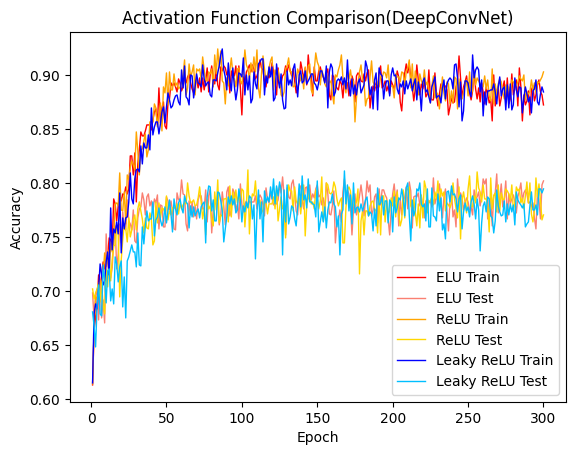

In [28]:
plt.title('Activation Function Comparison(DeepConvNet)')
plt.plot(x_axis, elu_train_acc, color='red',linewidth=1.0, label='ELU Train')
plt.plot(x_axis, elu_test_acc, color='salmon',linewidth=1.0, label='ELU Test')
plt.plot(x_axis, relu_train_acc, color='orange',linewidth=1.0, label='ReLU Train')
plt.plot(x_axis, relu_test_acc, color='gold',linewidth=1.0, label='ReLU Test')
plt.plot(x_axis, lrelu_train_acc, color='blue',linewidth=1.0, label='Leaky ReLU Train')
plt.plot(x_axis, lrelu_test_acc, color='deepskyblue',linewidth=1.0, label='Leaky ReLU Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

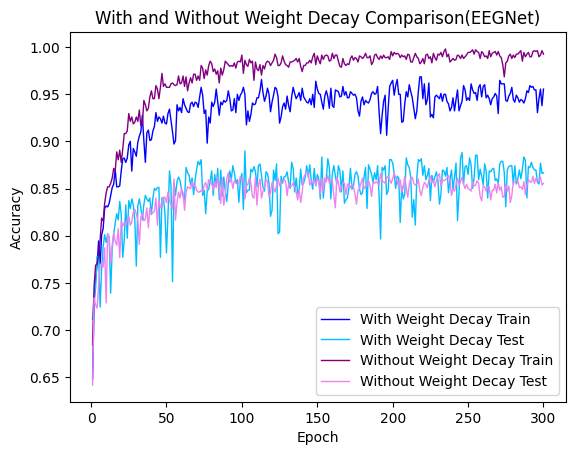

In [39]:
plt.title('With and Without Weight Decay Comparison(EEGNet)')
plt.plot(x_axis, weight_decay_train, color='blue',linewidth=1.0, label='With Weight Decay Train')
plt.plot(x_axis, weight_decay_test, color='deepskyblue',linewidth=1.0, label='With Weight Decay Test')
plt.plot(x_axis, no_weight_decay_train, color='purple',linewidth=1.0, label='Without Weight Decay Train')
plt.plot(x_axis, no_weight_decay_test, color='violet',linewidth=1.0, label='Without Weight Decay Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

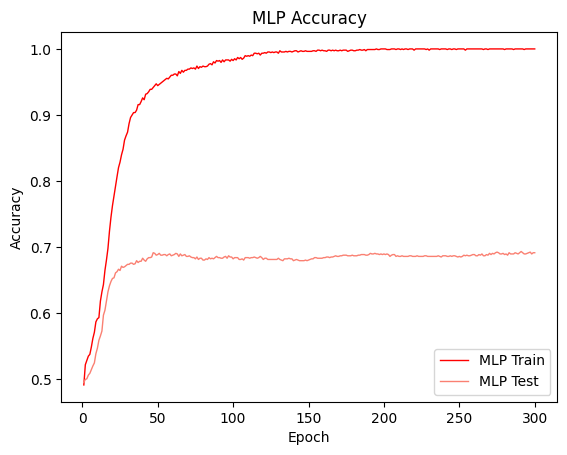

In [56]:
plt.title('MLP Accuracy')
plt.plot(x_axis, MLP_train, color='red',linewidth=1.0, label='MLP Train')
plt.plot(x_axis, MLP_test, color='salmon',linewidth=1.0, label='MLP Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()